<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b>

Приветствую тебя еще раз!) Спасибо за то, что доработал проект!

Мои комментарии будут также обозначены разными цветами, но с пометкой 2:
    
    «КОММЕНТАРИЙ РЕВЬЮВЕРА 2: ... »

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 
    
    
Александр, ты выполнил очень хороший проект и проделал большую работу, молодец! Желаю успехов в дальнейшем обучении)

</div>

<b>КОММЕНТАРИЙ РЕВЬЮВЕРА</b>

Привет, Александр👋!)

Меня зовут Обидин Андрей, я осуществлял проверку проекта. Может перейдем сразу на <b>ты</b>? Если это неприемлемо, то обязательно дай знать)

Благодарю тебя за то, что вовремя всё сдал и хорошо поработал!)


`Александр, у тебя очень классный проект! Ты большой молодец, что провел такой глубокий анализ и использовал интерсные подходы, а также графики) Есть несколько небольших моментов на доработку, плюс я оставлял некоторые примеры \ альтернативные способы`

Далее по ходу работы ты сможешь встретить мои комментарии, они будут отмечены разными цветами:

<div class="alert alert-block alert-success">
Похвала и возможности развития
</div>
<div class="alert alert-block alert-warning">
Некритичные замечания, но стоит обратить внимание
</div>
<div class="alert alert-block alert-danger">
Грубая ошибка, необходимо исправить
</div>


Заранее прошу не удалять мои комментарии, это важно. Если у тебя возникнут вопросы, обозначь их, я с радостью тебе помогу!)

Как вариант, можешь обозначить их так:
<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
</div>

In [1]:
#%pip install -q -r requirements.txt

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** — ответить на вопросы:
1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

## Обзор данных

Познакомимся с предоставленными данными

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
from pymystem3 import Mystem
sns.set(style='whitegrid', palette = 'tab10')
df = pd.read_csv('/datasets/data.csv')
df

children  days_employed  dob_years education  education_id  \
0             1   -8437.673028         42    высшее             0   
1             1   -4024.803754         36   среднее             1   
2             0   -5623.422610         33   Среднее             1   
3             3   -4124.747207         32   среднее             1   
4             0  340266.072047         53   среднее             1   
...         ...            ...        ...       ...           ...   
21520         1   -4529.316663         43   среднее             1   
21521         0  343937.404131         67   среднее             1   
21522         1   -2113.346888         38   среднее             1   
21523         3   -3112.481705         38   среднее             1   
21524         2   -1984.507589         40   среднее             1   

          family_status  family_status_id gender income_type  debt  \
0       женат / замужем                 0      F   сотрудник     0   
1       женат / замужем                 0      F   сотрудник     0   
2       женат / замужем                 0      M   сотрудник     0   
3       женат / замужем                 0      M   сотрудник     0   
4      гражданский брак                 1      F   пенсионер     0   
...                 ...               ...    ...         ...   ...   
21520  гражданский брак                 1      F   компаньон     0   
21521   женат / замужем                 0      F   пенсионер     0   
21522  гражданский брак                 1      M   сотрудник     1   
21523   женат / замужем                 0      M   сотрудник     1   
21524   женат / замужем                 0      F   сотрудник     0   

        total_income                       purpose  
0      253875.639453                 покупка жилья  
1      112080.014102       приобретение автомобиля  
2      145885.952297                 покупка жилья  
3      267628.550329    дополнительное образование  
4      158616.077870               сыграть свадьбу  
...              ...                           ...  
21520  224791.862382             операции с жильем  
21521  155999.806512          сделка с автомобилем  
21522   89672.561153                  недвижимость  
21523  244093.050500  на покупку своего автомобиля  
21524   82047.418899         на покупку автомобиля  

[21525 rows x 12 columns]

В таблице 12 столбцов описывающих информацию о заемщиках. 

Согласно документации к данным:
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

In [3]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Имеется 2174 строки в которых отсутствует информация о трудовом стаже и ежемесячном доходе

In [4]:
print(f'Из них одновременно данные пропущены в обоих: {df[(df.days_employed.isna()) & (df.total_income.isna())].shape[0]}')

Из них одновременно данные пропущены в обоих: 2174


### Дубликаты

In [5]:
print(f'Количество явных дубликатов в данных {df.duplicated().sum()}')

Количество явных дубликатов в данных 54


Проанализируем подробнее каждую характеристику.

### children

In [6]:
df.children.value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В информации о количестве детей обращает на себя внимания 2 типа значений.

-1 может являться или ошибкой ввода данных "через дефис" или символом отсутствия данных.

Из-за отсутствия данных в которых количество детей находится в промежутке 5-20. 20 является либо опечаткой, либо у банка очень выгодные условия кредитования для семей с 20 детьми

### days_employed

In [7]:
df.groupby('income_type', as_index=False).agg({'days_employed':['min', 'mean', 'max']})
# минимум, среднее, максимум для каждого типа в income_type

income_type  days_employed                              
                              min           mean            max
0      безработный  337524.466835  366413.652744  395302.838654
1        в декрете   -3296.759962   -3296.759962   -3296.759962
2      госслужащий  -15193.032201   -3399.896902     -39.954170
3        компаньон  -17615.563266   -2111.524398     -30.195337
4        пенсионер  328728.720605  365003.491245  401755.400475
5  предприниматель    -520.848083    -520.848083    -520.848083
6        сотрудник  -18388.949901   -2326.499216     -24.141633
7          студент    -578.751554    -578.751554    -578.751554

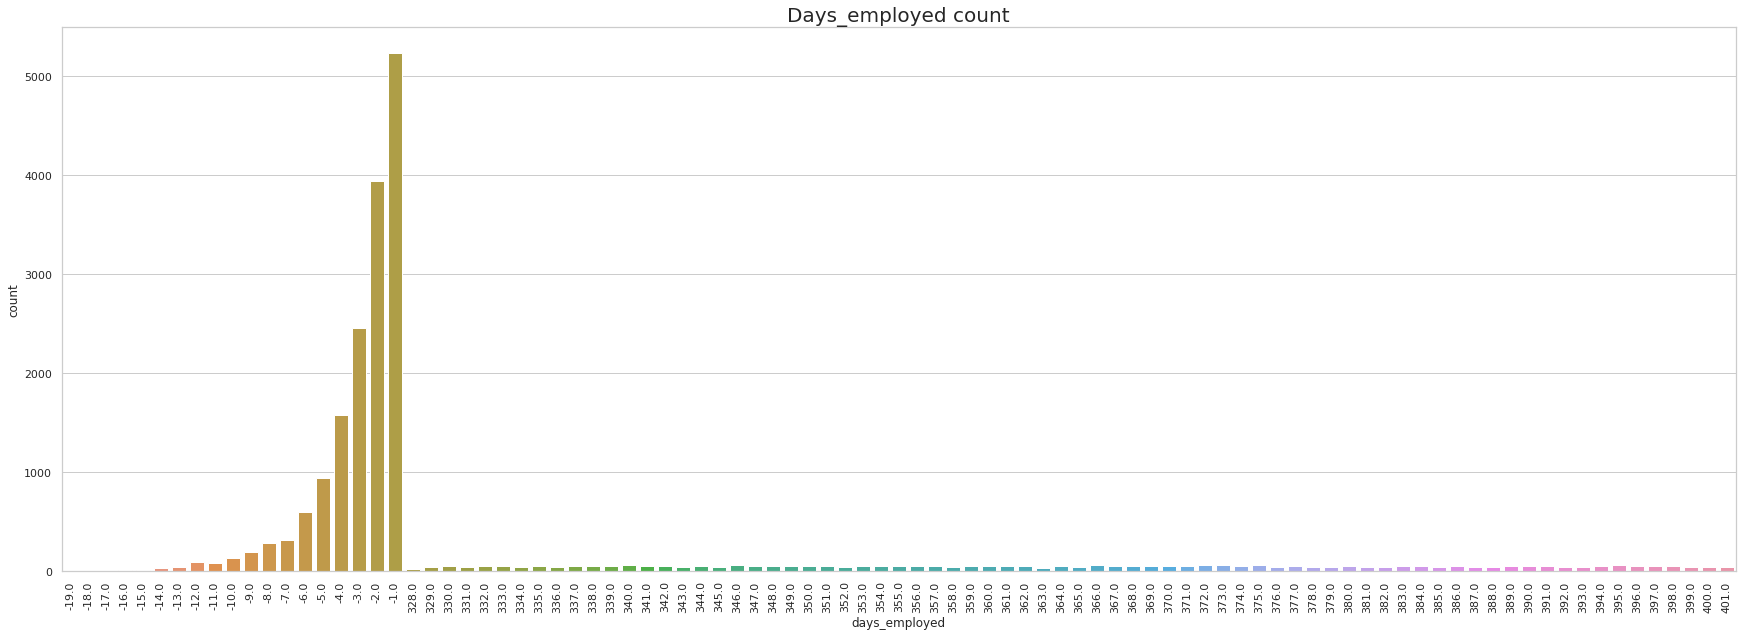

In [8]:
plt.figure(figsize=(30,10))
plt.title('Days_employed сount',  fontsize = 20)
plt.xticks(rotation=90)
sns.countplot(data=df, x=df.days_employed//1000)

В сведениях о трудовом стаже есть 2 типа данных:
1. Положительные значения. Присутвующие исключетельно в строках с заемщиками типа занятости "пенсионер" и "безработный". И представляющие собой величины не совместимые с реальность. Так как в возрасте 60 лет иметь 1000летний стаж работы может быть возможным только в фантастических условиях не рассматриваемых в рамках данной работы.



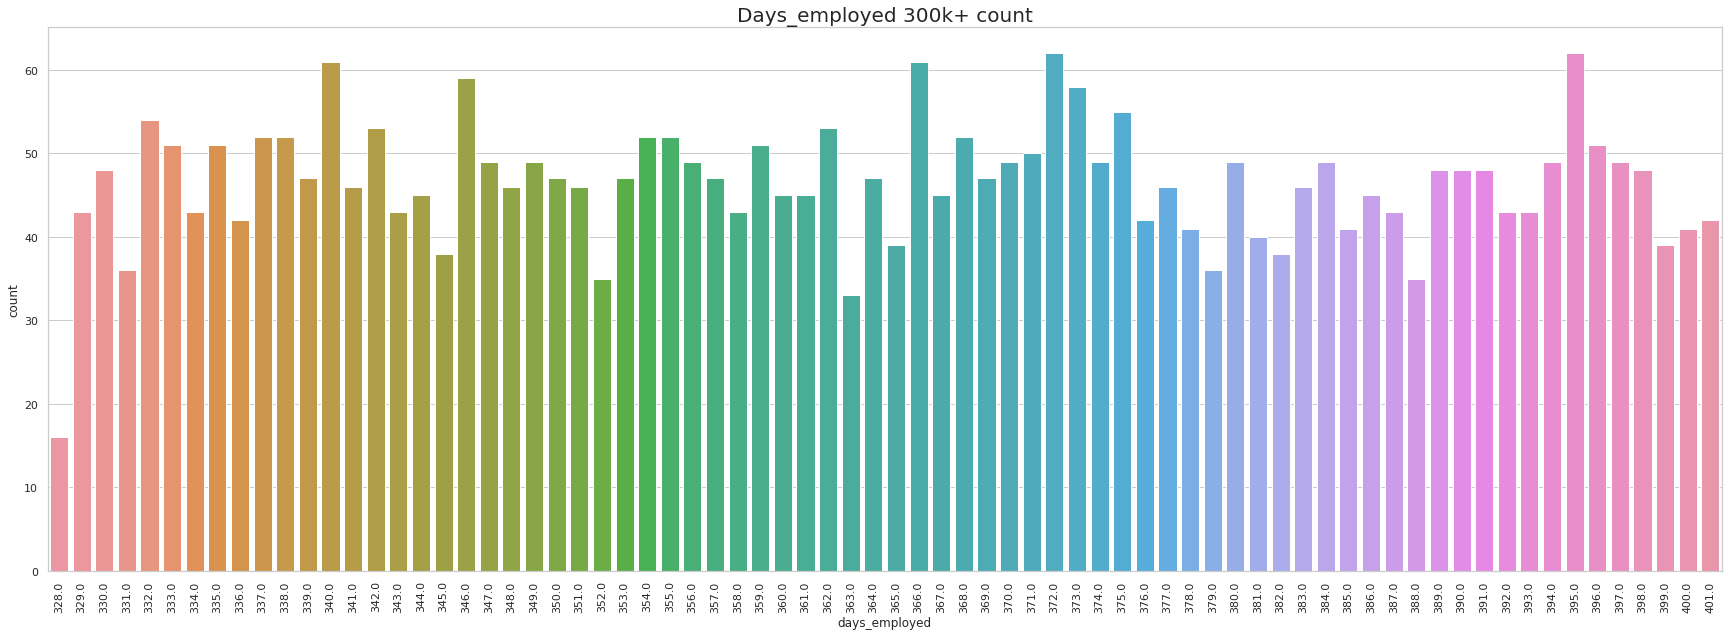

In [9]:
plt.figure(figsize=(30,10))
plt.title('Days_employed 300k+ сount',  fontsize = 20)
plt.xticks(rotation=90)
sns.countplot(data=df[df.days_employed >300000], x=df[df.days_employed >300000].days_employed//1000)
# количество значение тысячной части от days_employed для значенией выше 300тыс

Которые распределены относительно равномерно в промежутке ~328-401 тыс.

2. Отрицательные значения. Количество которых гиперболически убывает с ростом (отрицательным :)) значений. 

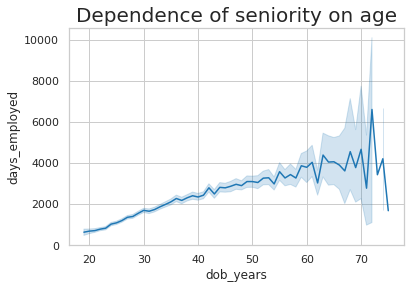

In [10]:
plt.title('Dependence of seniority on age',  fontsize = 20)
sns.lineplot(x=df[(df.income_type != 'пенсионер') &\
                  (df.income_type != 'безработный') & (df.dob_years != 0)].dob_years,\
             y=df[(df.income_type != 'пенсионер') &\
                  (df.income_type != 'безработный') & (df.dob_years != 0)].days_employed.abs())
# зависимость dob_years от модуля days_employed

Отрицательность значений снова спишем на ошибку заполнения данных спобосом "через дефис".  
Для трудового стажа в данных справедлива и логична зависимость, что с увеличением возраста средний показатель отработанных дней также увеличивается

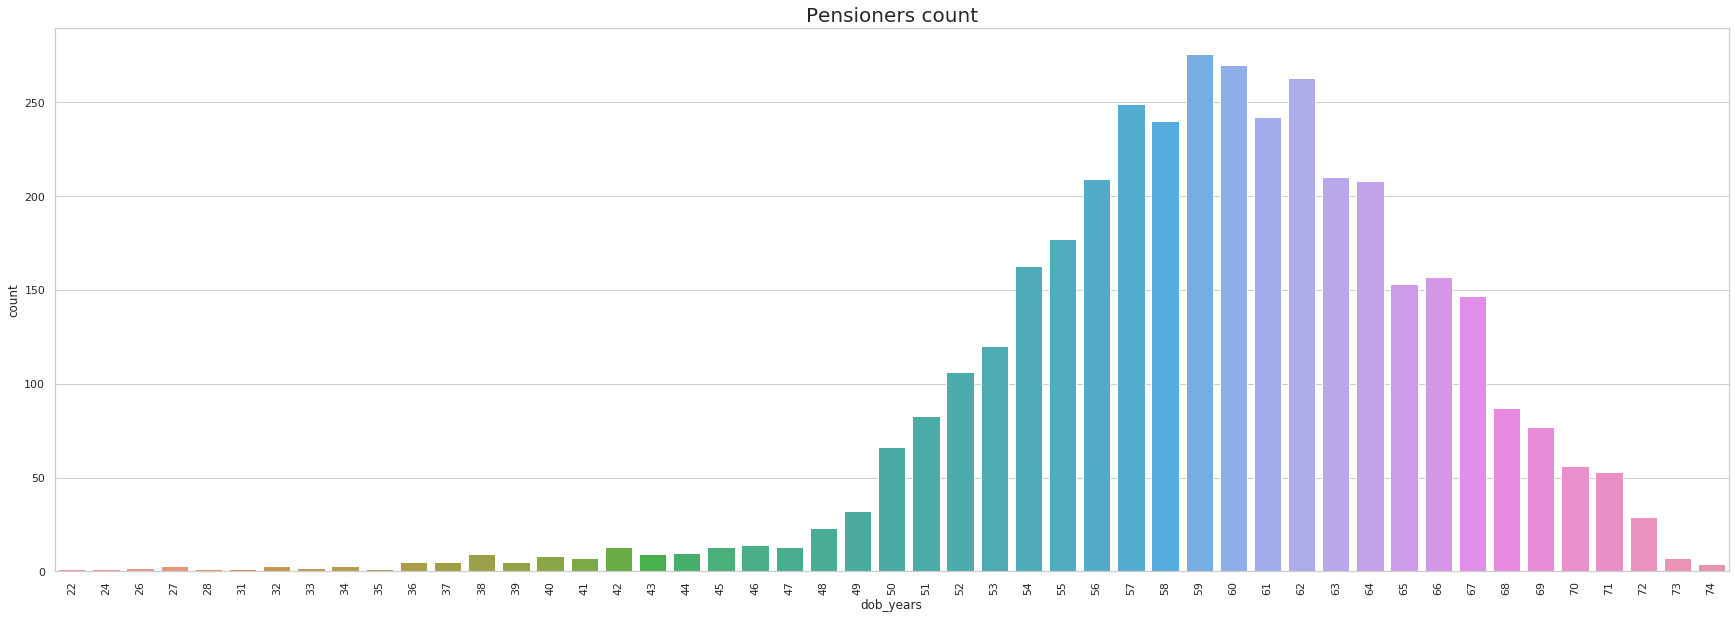

In [11]:
plt.figure(figsize=(30,10))
plt.title('Pensioners count',  fontsize = 20)
plt.xticks(rotation=90)
sns.countplot(data=df[(df.income_type == 'пенсионер') & (df.dob_years != 0)],\
              x=df[(df.income_type == 'пенсионер') & (df.dob_years != 0)].dob_years)

Не зная всех видов государственных льгот, будем считать что эти счасливые (или несчастные) 20-30 летние пенсионеры реальные члены современного общества.  
Наиболее интенсивный рост количества пенсионеров (безработных рассматривать не будем, так как их всего 2) наблюдается от 50 до 60 лет. Следовательно это основной промежуток выхода на пенсию. Логично предположить, что после выхода на пенсию, трудовой стаж не увеличивается.

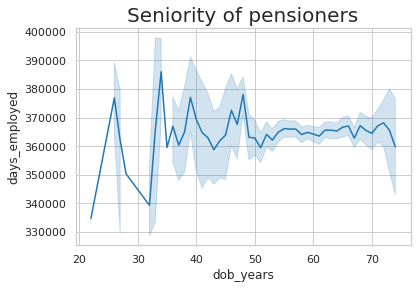

In [12]:
plt.title('Seniority of pensioners',  fontsize = 20)
sns.lineplot(x=df[(df.income_type == 'пенсионер') & (df.dob_years != 0)].dob_years,\
             y=df[(df.income_type == 'пенсионер') & (df.dob_years != 0)].days_employed)

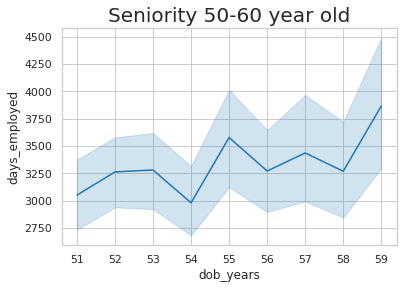

In [13]:
plt.title('Seniority 50-60 year old',  fontsize = 20)
sns.lineplot(x=df[(df.income_type != 'пенсионер') & (df.dob_years > 50) & (df.dob_years < 60)].dob_years,\
             y=df[(df.income_type != 'пенсионер') & (df.dob_years > 50) & (df.dob_years < 60)].days_employed.abs())

При этом средний стаж у работающих в таком возрастном промежутке находится между 3000 и 4000 дней.  
Что совпадает с данными по пенсионерам если их разделить на 100.  
Следовательно, примем теорию, что из-за ошибки при заполнение данных, вероятней всего для пенсионеров значения трудового стажа в днях увеличины в 100 раз.

### dob_years

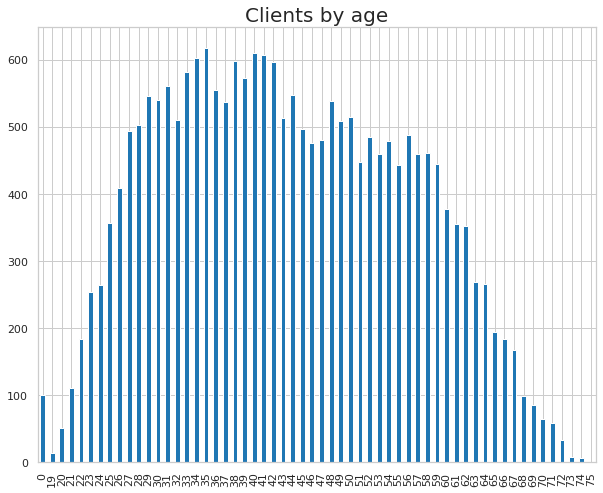

In [14]:
plt.figure(figsize=(10,8))
plt.title('Сlients by age',  fontsize = 20)
df.dob_years.value_counts().sort_index().plot(kind='bar')

В данных о возрасте стоит обратить внимание на 101 значение 0. И задуматься об открытии филиала банка в роддоме

### education

In [15]:
df.education.value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

сТоИт пОДУмАть о пРиВеДЕНИи даННыХ к ЕдИНоМУ сТИлю.

### education_id

In [16]:
df.education_id.value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

Первый стобец без замечаний. Жаль что бесполезный.

### family_status

In [17]:
df.family_status.value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

### family_status_id

In [18]:
df.family_status_id.value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

Главней всего порядок в доме. А все другое...

### gender

In [19]:
df.gender.value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Есть тёти как тёти,  
Есть дяди как дяди,  
Есть люди как люди...

### income_type

In [20]:
df.income_type.value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

Группы из 1 и 2 человек слишком малочисленны для анализа.

### debt

In [21]:
df.debt.value_counts()

0    19784
1     1741
Name: debt, dtype: int64

Каждый 13 заемщик имел задолжности

### total_income

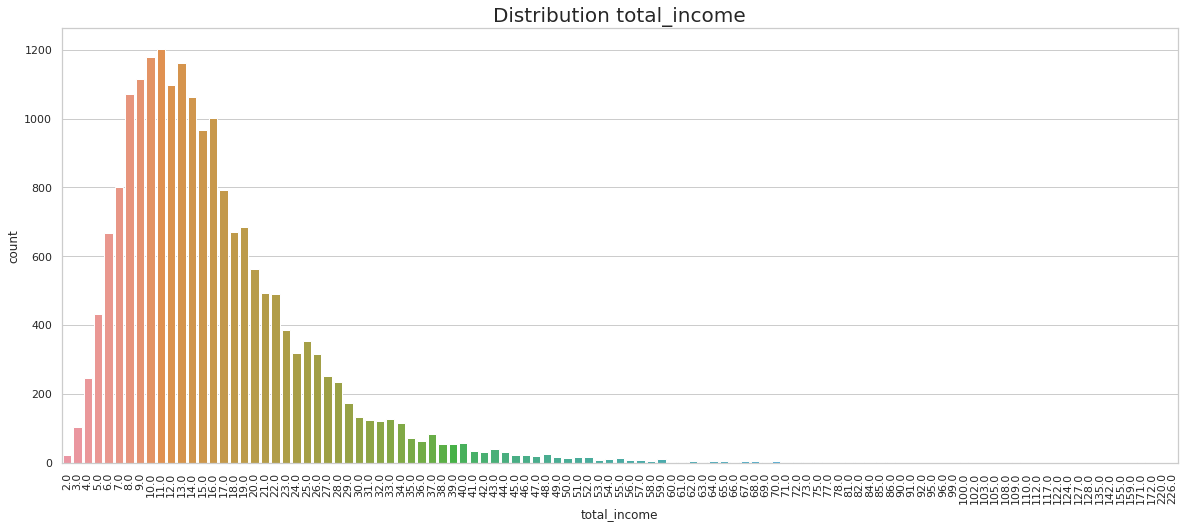

In [22]:
plt.figure(figsize=(20,8))
plt.title('Distribution total_income',  fontsize = 20)
plt.xticks(rotation=90)
sns.countplot(data=df, x=df.total_income//10000)

Богатые тоже ̶~плачут~ занимают

### purpose

In [23]:
df.purpose.value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Разнообразные речевые обороты это конечно хорошо, но не в данном случае.

### Выводы

Так как нет возможности задать дополнительные вопросы о характере данных, необходимо предобработать имеющиеся:
1. Удалить дубликаты.
2. В данных о количестве детей приемем значение 20 за опечатку и заменим на 2. А происхождение величины -1 будем считать написанием "через дефис" и исправим на 1
3. В информации о стаже требуется исправить отрицательные значения на положительные, а стаж для пенсионеров разделить на 100.
4. Следует обработать строки с нулевым возрастом.
5. В колонке с уровенем образования заемщика привести все значения к строчным символам.
6. Проследить в какой туалет пойдет человек XNA пола. 
7. Удалить или перераспределить группы состоящие из малочисленных случаев.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Молодец, очень хороший обзор датафрейма! Похвально, что ты делаешь графики

</div>

## Предобработка данных

### education

In [24]:
df.education = df.education.str.lower()

In [25]:
df.education.value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

✔ Make education small Again

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 
    
    
Отлично!

</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Попробуй сместить обработку регистра в блок дубликатов и перепроверить полные дубликаты

</div>

### Обработка дубликатов

In [26]:
print(f'После обработки регистра, количество явных дубликатов в данных: {df.duplicated().sum()}')

После обработки регистра, количество явных дубликатов в данных: 71


~Почему я не привел значения к единому регистру перед поиском дубликатов?  
Дубликат является повторно изготовленным экземпляром какой-то записи. Соответственно при наличии записи в регистре, отличающемся от монолитно-строчного, её дубликат копирует не только информацию, но и её формат. Следовательно истинные дубликаты будут найдеты еще до обработки регистра~

In [27]:
df[df.duplicated()].isna().sum()

children             0
days_employed       71
dob_years            0
education            0
education_id         0
family_status        0
family_status_id     0
gender               0
income_type          0
debt                 0
total_income        71
purpose              0
dtype: int64

Отсутвие значений в самых вариативных колонках `days_employed` и  `total_income` увеличивает вероятность, что найденный дубликат просто окажется уникальной записью заемщика с характеристиками идентичными встречавшимися ранее.  
Для предотвращения в будущем таких неопределенностей банку стоит предоставлять\собирать информацию используя уникальный id заемщика и дату оказания услуги.

В этот раз пожертвуем 71 запись так как это незначительная доля в данных, потеря которых не значительно скажется на результатах.

In [28]:
df = df.drop_duplicates().reset_index(drop=True)

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
1. Все же стоит привести регистр образования к единому формату и удалить неявные дубликаты по всему датафрейму

2. При удалении дубликатов стоит обновлять индексы через reset_index()


P.s. мысль про уникальный id клиента очень даже хорошая

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
Не то, чтобы я сильно скучаю по этим 17 строкам. Я исправил замечание, но не понял почему мои прошлые рассуждения не верны.
</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 
    
    
Они не то, чтобы не верны, дело в том, что обрабатывать регистр категориальных признаков правда важно, потому что это приводит к детектированию дополнительных дубликатов в данных. Важно было, чтобы мы рассмотрели это и в будущем ты уже мог замечать такие вещи. Если бы у нас был признак с id клиента, то стало бы куда проще

</div>

### children

Исходя из предположения что 20 это опечатка при вводе 2, а -1 это 1 записанная с дефисом, исправим исходные данные

In [29]:
df.loc[(df.children == 20), 'children'] = 2 # заменяем 20 на 2
df.loc[:, 'children'] = df.children.abs() # избавляемся от отрицательных значений 

И проверим результат

In [30]:
df.children.value_counts()

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

### days_employed

Согласно сделанным ранее выводам приведем стаж заемщиков к единообразному виду:  
Изменим знак для отрицательных значений  
Для пенсионеров и безработных разделим стаж на 100

In [31]:
df.loc[:, 'days_employed'] = df.days_employed.apply(lambda x: (x/100) if (x > 300000) else (abs(x)))
# Делим на 100 все значения больше 300000, остальные берем по модулю, чтобы избавиться от отрицательных значений

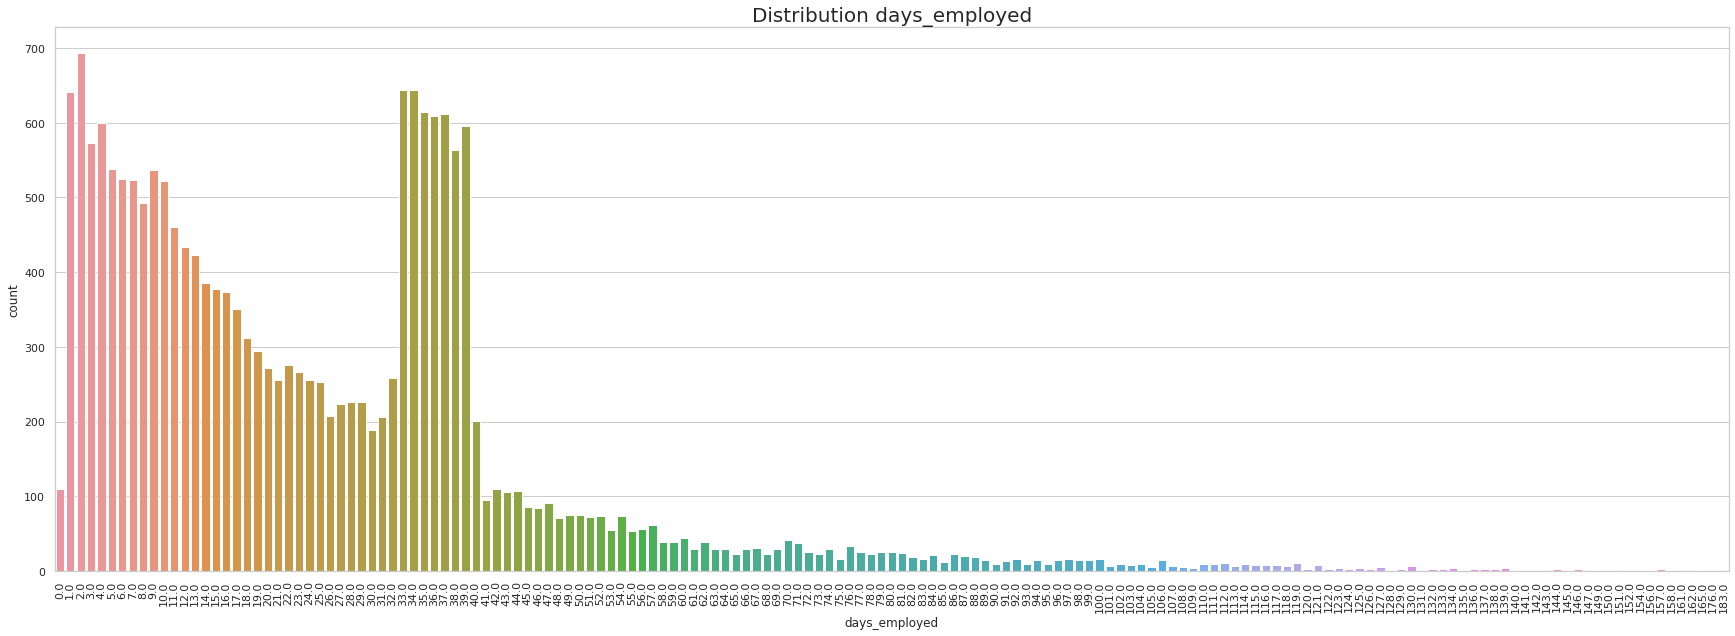

In [32]:
plt.figure(figsize=(30,10))
plt.title('Distribution days_employed',  fontsize = 20)
plt.xticks(rotation=90)
sns.countplot(data=df, x=df.days_employed//100)

В деньгах чаще нуждаются те, кто мало работает или пенсионеры которые своё уже отработали.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Признак стажа очень аномальный, наверняка мы точно сейчас не узнаем, как правильно его обработать, можно лишь предположить

</div>

### Корреляции в данных.

Рассмотрим взаимозависимости характеристик

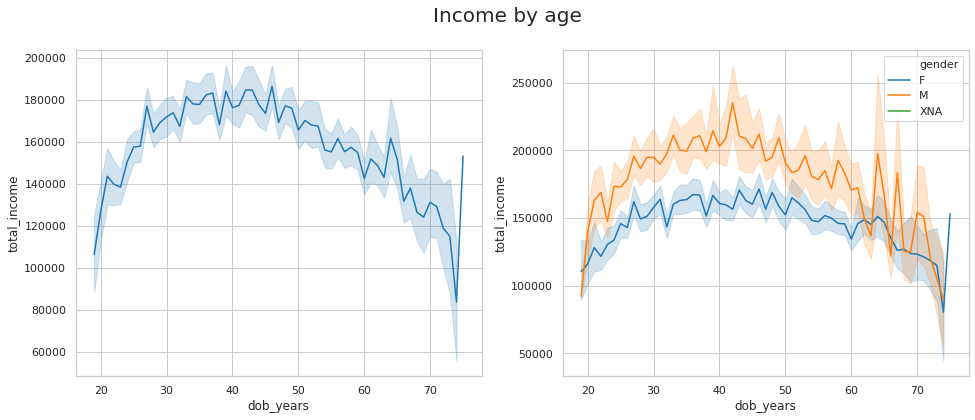

In [33]:
f, axs = plt.subplots(1,2,figsize=(16, 6))
plt.suptitle('Income by age',  fontsize = 20)
sns.lineplot(ax=axs[0], x=df[df.dob_years != 0].dob_years, y=df[df.dob_years != 0].total_income)
sns.lineplot(ax=axs[1], x=df[df.dob_years != 0].dob_years, y=df[df.dob_years != 0].total_income, hue=df.gender)

Средний ежемесячный доход растет до 40 лет, а после убывает. Зависимости для мужчин и женщин отличаются.

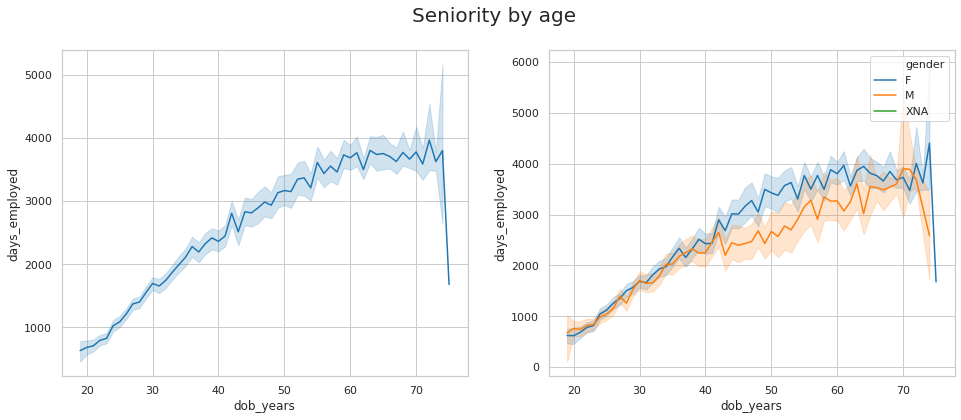

In [34]:
f, axs = plt.subplots(1,2,figsize=(16, 6))
plt.suptitle('Seniority by age',  fontsize = 20)
sns.lineplot(ax=axs[0], x=df[df.dob_years != 0].dob_years, y=df[df.dob_years >18].days_employed)
sns.lineplot(ax=axs[1], x=df[df.dob_years != 0].dob_years, y=df[df.dob_years > 18].days_employed, hue=df.gender)

Снова все логично. Чем больше живешь тем больше работаешь.  
Женщины больше работают и меньше зарабатывают. Не показывайте эти графики феминисткам.

На графиках хорошо заметен выброс.

In [35]:
df[df.dob_years > 74]

children  days_employed  dob_years education  education_id  \
8870         0    1678.969771         75   среднее             1   

       family_status  family_status_id gender  income_type  debt  \
8870  вдовец / вдова                 2      F  госслужащий     0   

       total_income                purpose  
8870  153282.648133  заняться образованием

75летний госслужащий. Практически не работавший, но с высоким доходом.  
Уберем его хотя бы из наших данных.

In [36]:
df = df.drop(index=[8870])

In [37]:
df[(df.gender != 'F') & (df.gender != 'M')]

children  days_employed  dob_years            education  education_id  \
10684         0    2358.600502         24  неоконченное высшее             2   

          family_status  family_status_id gender income_type  debt  \
10684  гражданский брак                 1    XNA   компаньон     0   

        total_income               purpose  
10684  203905.157261  покупка недвижимости

По ежемесечному доходу наш XNA-gender вероятнее принадлежит к обладателю Y-хромосомы, туда его и зачислим.

In [38]:
df.loc[10684, 'gender'] = 'M'

Те записи, в которых отсутвуют данные и о возрасте, и о стаже и о доходе 

In [39]:
df_three_na = df[(df.dob_years == 0) & (df.days_employed.isna() == True)]
df_three_na # DataFrame в котором все записи из df c dob_years = 0, days_employed = NaN и total_income = NaN

children  days_employed  dob_years education  education_id  \
1890          0            NaN          0    высшее             0   
2284          0            NaN          0   среднее             1   
4062          1            NaN          0   среднее             1   
5010          0            NaN          0   среднее             1   
6405          0            NaN          0    высшее             0   
6664          0            NaN          0    высшее             0   
8565          0            NaN          0   среднее             1   
12381         3            NaN          0   среднее             1   
13716         0            NaN          0   среднее             1   
19770         0            NaN          0   среднее             1   

               family_status  family_status_id gender income_type  debt  \
1890   Не женат / не замужем                 4      F   сотрудник     0   
2284          вдовец / вдова                 2      F   пенсионер     0   
4062        гражданский брак                 1      M   компаньон     0   
5010         женат / замужем                 0      F   компаньон     0   
6405        гражданский брак                 1      F   пенсионер     0   
6664               в разводе                 3      F   пенсионер     0   
8565         женат / замужем                 0      F   сотрудник     0   
12381        женат / замужем                 0      M   сотрудник     0   
13716       гражданский брак                 1      F   сотрудник     0   
19770        женат / замужем                 0      F   сотрудник     0   

       total_income                                purpose  
1890            NaN                                  жилье  
2284            NaN                           недвижимость  
4062            NaN                           ремонт жилью  
5010            NaN                   покупка недвижимости  
6405            NaN                                свадьба  
6664            NaN             покупка жилой недвижимости  
8565            NaN                           недвижимость  
12381           NaN  операции с коммерческой недвижимостью  
13716           NaN                  на проведение свадьбы  
19770           NaN                                  жилье

Будут скорее затруднять, а не способствовать дальнейшему анализу.  
Поэтому продолжим без них.

In [40]:
df = df.loc[~df.index.isin(df_three_na.index)] # убираем из df все записи собранные в df_three_na

По 1-2 представителям отраслей и профессий зависимостей не построить, поэтому их также исключим из оцениваемых данных.

In [41]:
df.query("income_type in ['предприниматель', 'безработный', 'студент', 'в декрете']")

children  days_employed  dob_years education  education_id  \
3132          1    3375.244668         31   среднее             1   
5931          0            NaN         58    высшее             0   
9399          0     578.751554         22    высшее             0   
14767         0    3953.028387         45    высшее             0   
18647         0     520.848083         27    высшее             0   
20778         2    3296.759962         39   среднее             1   

               family_status  family_status_id gender      income_type  debt  \
3132         женат / замужем                 0      M      безработный     1   
5931         женат / замужем                 0      M  предприниматель     0   
9399   Не женат / не замужем                 4      M          студент     0   
14767       гражданский брак                 1      F      безработный     0   
18647       гражданский брак                 1      F  предприниматель     0   
20778        женат / замужем                 0      F        в декрете     1   

        total_income                                 purpose  
3132    59956.991984                 покупка жилья для сдачи  
5931             NaN              покупка жилой недвижимости  
9399    98201.625314  строительство собственной недвижимости  
14767  202722.511368                            ремонт жилью  
18647  499163.144947                   на проведение свадьбы  
20778   53829.130729                              автомобиль

In [42]:
df = df.loc[~df.index.isin(df.query("income_type in ['предприниматель', 'безработный', 'студент', 'в декрете']").index)]
# убираем из df все записи с income_type в которых по 1-2 значения

Посмотрим также на наличие различий между группами занятости 

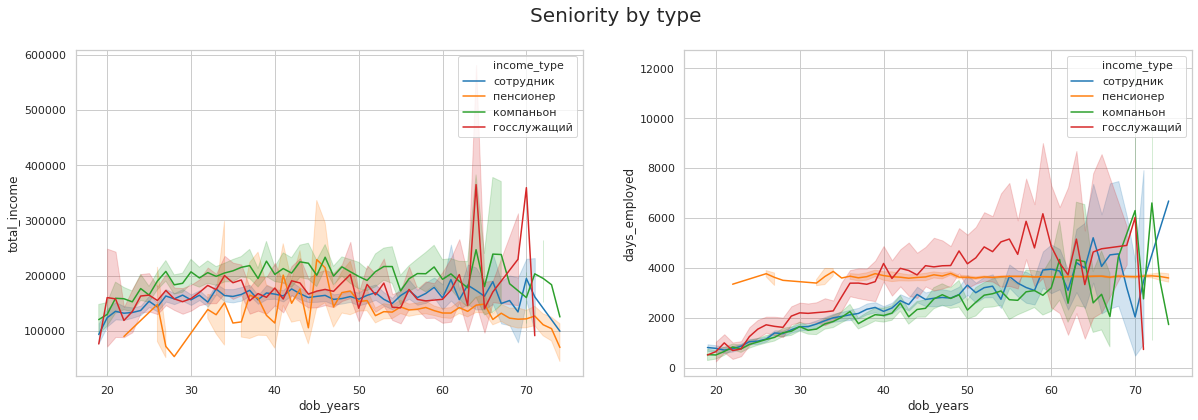

In [43]:
f, axs = plt.subplots(1,2,figsize=(20, 6))
plt.suptitle('Seniority by type',  fontsize = 20)
sns.lineplot(ax=axs[0], x=df[df.dob_years != 0].dob_years, y=df.total_income, hue=df.income_type)
sns.lineplot(ax=axs[1], x=df[df.dob_years != 0].dob_years, y=df.days_employed, hue=df.income_type)

Заемщик пенсионер и госслужащий имеют возрастные промежутки в которых средний стаж выше чем у остальных типов занятости. 

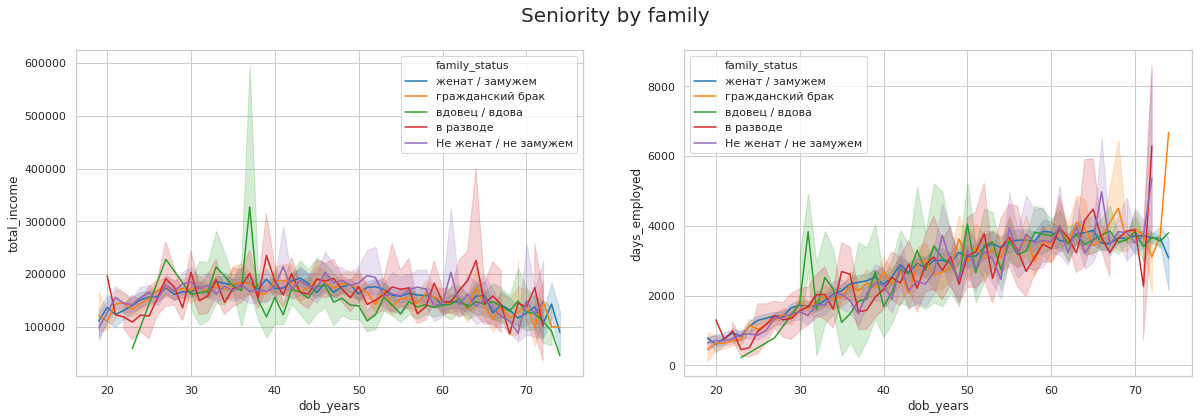

In [44]:
f, axs = plt.subplots(1,2,figsize=(20, 6))
plt.suptitle('Seniority by family',  fontsize = 20)
sns.lineplot(ax=axs[0], x=df[df.dob_years != 0].dob_years, y=df.total_income, hue=df.family_status)
sns.lineplot(ax=axs[1], x=df[df.dob_years != 0].dob_years, y=df.days_employed, hue=df.family_status)

А вот с точки зрения семейного положения все равны.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    

Мне очень нравится, как ты делаешь анализ через графики и формируешь выводы, на данном кейсе такое редко встретишь, ты большой молодец!
</div>

Вооружившись новыми знаниями, заменим все нулевые значения возраста на средний возраст заемщиков с аналогичным стажем, доходом, полом и типом занятости.

In [45]:
df_without_zero = df.loc[~df.index.isin(df[df.dob_years == 0].index)]
# DataFrame в котором все записи из df c dob_years != 0

In [46]:
def age_calc(df, row): # принимает DataFrame с данными и строку
    res = df[(df.days_employed < row.days_employed+1000) &\
              (df.days_employed > row.days_employed-1000) &\
              (df.total_income < row.total_income+20000) &\
              (df.total_income > row.total_income-20000) &\
              (df.gender == row.gender) & (df.income_type == row.income_type)]    
    if res.shape[0]>6: # Сравнивает с схожими записями если смог найти больше 6 записей
        return int(res.dob_years.mean()) # Возвращает среднее значение возраста
    else: # Если не смог найти 6 схожих записей, то снова ищет не учитывая показатель income_type
        return int(df[(df.days_employed < row.days_employed+1000) &\
                      (df.days_employed > row.days_employed-1000) &\
                      (df.total_income < row.total_income+20000) &\
                      (df.total_income > row.total_income-20000) &\
                      (df.gender == row.gender)].dob_years.mean()) # Возвращает среднее значение возраста

In [47]:
df.loc[(df.dob_years == 0), 'dob_years'] = df[df.dob_years == 0].apply(lambda x: age_calc(df_without_zero, x), axis=1)
# Для каждой строки с нулевым возрастом, найти схожие записи по остальным показателям и взять из них средний возраст

In [48]:
print(f' Количество записей с нулевым возрастом после обработки данных: {df[df.dob_years == 0].shape[0]}')

 Количество записей с нулевым возрастом после обработки данных: 0


In [49]:
print(f' Количество возможных вариантов возраста в имеющемся промежутке: {df.dob_years.max()+1-df.dob_years.min()}')
print(f' Количество имеющихся вариантов возраста в имеющемся промежутке: {df.dob_years.nunique()}')

 Количество возможных вариантов возраста в имеющемся промежутке: 56
 Количество имеющихся вариантов возраста в имеющемся промежутке: 56


Имея данные по каждому возрасту, аналогичным способом, но теперь в обратной зависимости заполняем отсутствующие данные в колонках `days_employed` и `total_income`

In [50]:
def worth_calc(df, row): # принимает DataFrame с данными и строку
    with_income_type = df[(df.dob_years == row.dob_years) & (df.gender == row.gender)\
              & (df.income_type == row.income_type)].days_employed.mean(),\
            df[(df.dob_years == row.dob_years) & (df.gender == row.gender)].total_income.mean()
    if sum(with_income_type)>max(with_income_type): #сравнение с NaN всегда выдает False
        return with_income_type #Если записей достаточно чтобы взять средний и days_employed и total_income возращает его
    else: #Иначе берет записи не учитывая income_type для days_employed
        return df[(df.dob_years == row.dob_years) & (df.gender == row.gender)].days_employed.mean(),\
    df[(df.dob_years == row.dob_years) & (df.gender == row.gender)].total_income.mean() #Возращает средние
    
    
   

In [51]:
df.loc[(df.days_employed.isna()), ['days_employed', 'total_income']] =\
df[df.days_employed.isna()].apply(lambda x: worth_calc(df, x), axis=1).tolist()
# Для каждой строки с пропущенными значениями в days_employed и total_income,
#найти схожие записи по остальным показателям и взять из них средние days_employed и total_income

Убедимся в том, что все пропуски заполнены

In [52]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Настало время преобразовать `days_employed` и `total_income` в целочисленные значения.

In [53]:
df.days_employed = df.days_employed.astype(int) #days_employed float->int
df.total_income = df.total_income.astype(int) #total_income float->int

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 

Интересный способ заполнения пропусков, однако я подумал, что можно еще попрбовать зайти через сводные таблицы

Условный пример:
    
    
    # СПОСОБ 1, ЦИКЛ
    # сформируем сводную табличку с группировкой по типу занятости и измерением медианного дохода

    group_income = df.groupby('income_type')['total_income'].median()


    # заполним пропуски на медианный доход, основываясь на типе занятости
    for i in group_income.index:

        df.loc[(data['income_type'] == i) & (df['total_income'].isnull()), 'total_income'] = group_income[i]
        
        
    # СПОСОБ 2, transform
    #создаем переменные по медиане зарплаты
    med_salary = df.groupby('income_type')['total_income'].transform('median')

    #заменяем пропуски медианой по каждой группе
    df['total_income'] = df['total_income'].fillna(med_salary)
    
</div>

### Лемматизация `purpose`

Подключаем лемматизатор

In [54]:
myst = Mystem()

Освежим снова в памяти содержимое `purpose`

In [55]:
df.purpose.sort_values().unique() 

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

Все значения можно разбить на 6 категорий:  
1. Свадьба
2. Коммерческий займ
3. Недвижимость
4. Автомобиль
5. Образование

In [56]:
def lema(row): # Берет строку
    targets = myst.lemmatize(row.purpose) # Лемматизирует значение в purpose
    for target in targets: # ищет соответствия объявленным категориям
        if target in ['свадьба', 'коммерческий', 'недвижимость', 'жилье', 'автомобиль', 'образование']:
            return target if target != 'жилье' else 'недвижимость' # присваивает категорию. недвижимость == жилье

Преобразуем содержание `purpose` к выбранным категориям.

In [57]:
df.purpose = df.apply(lema, axis=1) # меняем значение в purpose на выбранные категории

In [58]:
df.purpose.value_counts()

недвижимость    9489
автомобиль      4305
образование     4012
свадьба         2321
коммерческий    1310
Name: purpose, dtype: int64

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 


Молодец, ты хорошо привел признак цели к единому формату!
</div>

## Подготовка данных к анализу.

In [59]:
df_summary = df.copy() #создаем копию которую будем преобразовывать для анализа

На выборке такого размера, излишне точные показатели будут скорей размывать общую картину, поэтому сгрупируем имеющиеся данный по группам.

По количеству детей информацию перегрупируем по 3 видам :
1. Бездетные
2. 1-2 ребенка
3. Многодетные

In [60]:
df_summary.children = df_summary.children.map({0: 'not',
                                               1: 'one/two',
                                               2: 'one/two',
                                               3: 'large',
                                               4: 'large',
                                               5: 'large'}) # переход от количесва к категориям

Трудовой стаж округлим до тысяч дней.

In [61]:
Counter((df_summary.days_employed//1000).sort_values()) # количество значений days_employed выраженные в тысячах без остатка  

Counter({0: 5324,
         1: 4438,
         2: 3162,
         3: 5622,
         4: 1094,
         5: 617,
         6: 317,
         7: 281,
         8: 193,
         9: 129,
         10: 84,
         11: 86,
         12: 35,
         13: 30,
         14: 12,
         15: 8,
         16: 3,
         17: 1,
         18: 1})

А всех у кого стаж более 10 тыс. дней из-за малочисленности припишем к группе десятитысячников.

In [62]:
df_summary.days_employed = df_summary.days_employed.apply(lambda x: (x//1000) if (x < 10000) else (10))
# дни переводим в тысячи дней, больше 10000 присваиваем 10

Возрастные промежутки разобьем на десятилетия.

In [63]:
df_summary.dob_years = df_summary.dob_years.apply(lambda x: f'{x//10*10}-{x//10*10+9}' if (x > 19) else ('19'))
# для значений больше 19 переходим от значений в годах, к десятилетиям

Взглянем на ежемесячный доход в группах с шагом в 10 тысяч.

In [64]:
Counter((df_summary.total_income//10000).sort_values())
# количество значений total_income выраженные в десятках тысяч без остатка  

Counter({2: 22,
         3: 103,
         4: 247,
         5: 432,
         6: 668,
         7: 802,
         8: 1072,
         9: 1115,
         10: 1179,
         11: 1209,
         12: 1152,
         13: 1246,
         14: 1430,
         15: 1387,
         16: 1479,
         17: 938,
         18: 761,
         19: 867,
         20: 745,
         21: 553,
         22: 492,
         23: 409,
         24: 318,
         25: 354,
         26: 317,
         27: 252,
         28: 234,
         29: 173,
         30: 134,
         31: 126,
         32: 121,
         33: 128,
         34: 115,
         35: 72,
         36: 64,
         37: 84,
         38: 55,
         39: 55,
         40: 58,
         41: 35,
         42: 32,
         43: 39,
         44: 32,
         45: 22,
         46: 24,
         47: 20,
         48: 26,
         49: 17,
         50: 15,
         51: 17,
         52: 18,
         53: 8,
         54: 10,
         55: 13,
         56: 8,
         57: 8,
         58: 6,
  

Разобьем всех заемщиков на 4 равные группы основываясь на ежемесечном доходе.  
Группа с наименьшим доходом - "низкий". Остальные по возрастанию соответственно "средний", "выше среднего", "высокий".

In [65]:
df_summary.total_income = pd.qcut(df_summary['total_income'],
                                  4, labels=["низкий", "средний", "выше среднего", "высокий"])

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 


Я подумал, что можно реализовать категоризацию, основываясь на квартилях распределения. Иными словами, все что до 1 квартиля (25%) — низкий доход, между 1 и мединой(2 квартиль) тоже будет 25% — средний доход, от медианы до 3 квартиля (25%) — выше среднего, а все что дальше 3 квартиля — высокий доход. Тебе поможет pd.qcut https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html 
</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 
    
    
Молодец, что попробовал новый способ категоризации!

</div>

Изменим название колонок на то, чему они теперь соответствуют и уберем лишнее 

In [66]:
df_summary.rename(columns={'days_employed': 'thousand_days_employed',
                            'dob_years': 'ten_years',
                            'total_income': 'income_level'}, inplace=True)
df_summary.drop(['education_id', 'family_status_id'], axis=1, inplace=True)
# дублирующие значения id нам не нужны

Посмотрим на получившиеся данные.

In [67]:
df_summary

children  thousand_days_employed ten_years education     family_status  \
0      one/two                       8     40-49    высшее   женат / замужем   
1      one/two                       4     30-39   среднее   женат / замужем   
2          not                       5     30-39   среднее   женат / замужем   
3        large                       4     30-39   среднее   женат / замужем   
4          not                       3     50-59   среднее  гражданский брак   
...        ...                     ...       ...       ...               ...   
21449  one/two                       4     40-49   среднее  гражданский брак   
21450      not                       3     60-69   среднее   женат / замужем   
21451  one/two                       2     30-39   среднее  гражданский брак   
21452    large                       3     30-39   среднее   женат / замужем   
21453  one/two                       1     40-49   среднее   женат / замужем   

      gender income_type  debt   income_level       purpose  
0          F   сотрудник     0        высокий  недвижимость  
1          F   сотрудник     0        средний    автомобиль  
2          M   сотрудник     0        средний  недвижимость  
3          M   сотрудник     0        высокий   образование  
4          F   пенсионер     0  выше среднего       свадьба  
...      ...         ...   ...            ...           ...  
21449      F   компаньон     0        высокий  недвижимость  
21450      F   пенсионер     0  выше среднего    автомобиль  
21451      M   сотрудник     1         низкий  недвижимость  
21452      M   сотрудник     1        высокий    автомобиль  
21453      F   сотрудник     0         низкий    автомобиль  

[21437 rows x 10 columns]

И оценим существует ли различие между сформированными группами в долях заемщиков с задолжностями.

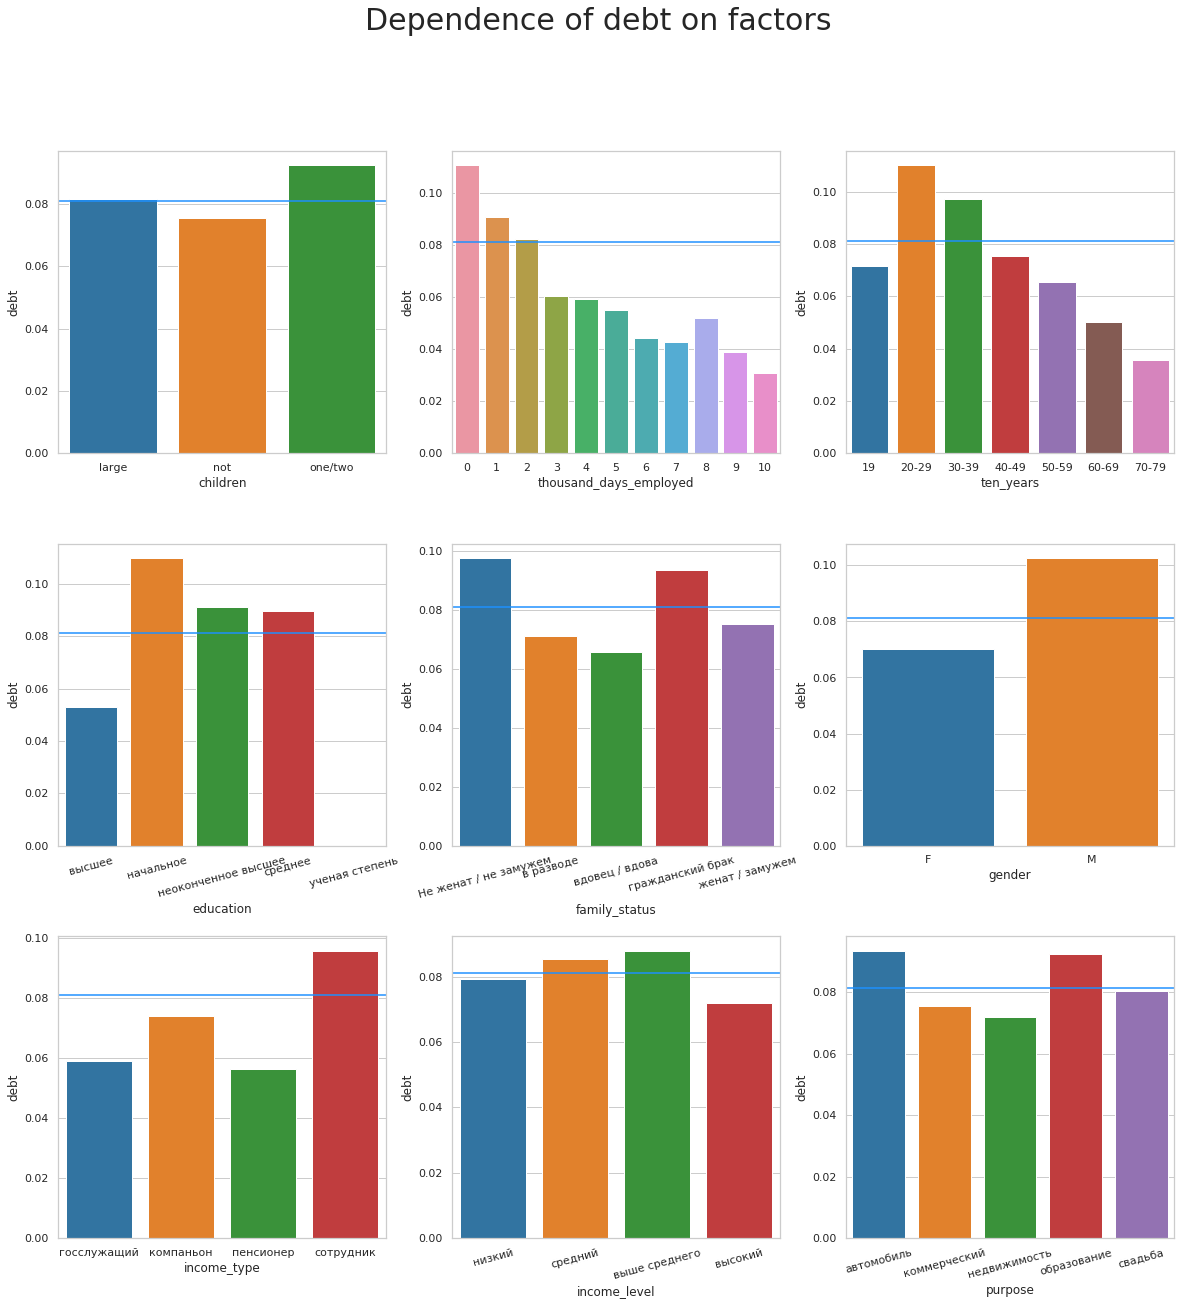

In [68]:
f, axs = plt.subplots(3,3,figsize=(20,20)) # поле 3х3 для гистограмм
plt.subplots_adjust(hspace=0.3)
axs=axs.ravel()
plt.suptitle('Dependence of debt on factors', fontsize = 30)
for i, col in enumerate(df_summary.columns.drop('debt')):
    g = sns.barplot(ax=axs[i], data=df_summary,\
                    x=df_summary.groupby(col).debt.mean().index,\
                    y=df_summary.groupby(col).debt.mean())
    if i in [3,4,7,8]:
        g.set_xticklabels(g.get_xticklabels(),rotation=15)

    axs[i].axhline(y=df_summary.debt.mean(), c='dodgerblue') #линия среднего значения debt для всей выборки

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Очень информативный график!

</div>

Для анализа влияния каждого из факторов создадим таблицу со значениями доли заемщиков в выборке исключающей данный фактор и доли состоящей исключительно из заемщиков с рассматриваемым фактором.

In [69]:
valuedf = pd.DataFrame(columns=['column_name','column_value','debt_without_mean','sample_mean','p_value'])

In [70]:
for col_name in df_summary.columns.drop('debt'): # Перебираем характеристики
    for value_name in df_summary[col_name].sort_values().unique().tolist(): # Перебираем каждую группу в характеристике
        sample = df_summary[df_summary[col_name] == value_name] #выборка с фактором
        df_without = df_summary.loc[~df_summary.index.isin(sample.index)] #выборка без фактора
        valuedf = valuedf.append({'column_name' : col_name,
                                  "column_value": value_name,
                                  "debt_without_mean": df_without.debt.mean(),
                                  "sample_mean": sample.debt.mean(),
                                  "p_value": stats.ttest_ind(sample.debt, df_without.debt)[1]}, ignore_index=True)
                                #оценка статистической значимости по t-критерию Стьюдента 

Для визуализации посчитаем какого относительное влияние каждого из факторов

In [71]:
valuedf['percentage_difference'] = (valuedf.sample_mean/valuedf.debt_without_mean*100)-100

И оставим только статистически значимые изменения

In [72]:
result = valuedf[valuedf.p_value < 0.05].sort_values(by='percentage_difference') 
# при p_value < 0.05 принимаем влияние статистически значимым
result

column_name           column_value  debt_without_mean  \
13  thousand_days_employed                     10           0.081740   
20               ten_years                  70-79           0.081480   
10  thousand_days_employed                      7           0.081632   
9   thousand_days_employed                      6           0.081676   
21               education                 высшее           0.090219   
19               ten_years                  60-69           0.084895   
35             income_type              пенсионер           0.086480   
8   thousand_days_employed                      5           0.081892   
6   thousand_days_employed                      3           0.088524   
31                  gender                      F           0.102543   
33             income_type            госслужащий           0.082729   
7   thousand_days_employed                      4           0.082289   
18               ten_years                  50-59           0.085491   
43                 purpose           недвижимость           0.088467   
1                 children                    not           0.091860   
30           family_status        женат / замужем           0.088962   
40            income_level                высокий           0.084152   
34             income_type              компаньон           0.083308   
39            income_level          выше среднего           0.078866   
4   thousand_days_employed                      1           0.078593   
44                 purpose            образование           0.078565   
41                 purpose             автомобиль           0.078041   
29           family_status       гражданский брак           0.078133   
2                 children                one/two           0.075673   
26           family_status  Не женат / не замужем           0.078641   
16               ten_years                  30-39           0.075250   
15               ten_years                  20-29           0.076123   
32                  gender                      M           0.070117   
36             income_type              сотрудник           0.065457   
24               education                среднее           0.060080   
3   thousand_days_employed                      0           0.071371   

    sample_mean       p_value  percentage_difference  
13     0.030769  2.770534e-03             -62.357019  
20     0.035714  3.045229e-02             -56.168082  
10     0.042705  1.757956e-02             -47.686215  
9      0.044164  1.517650e-02             -45.927856  
21     0.053023  9.423919e-18             -41.228218  
19     0.050193  6.821346e-09             -40.876177  
35     0.056456  6.928200e-10             -34.718083  
8      0.055105  1.631555e-02             -32.710067  
6      0.060299  2.722301e-11             -31.883862  
31     0.070117  1.727273e-16             -31.621617  
33     0.059066  1.407980e-03             -28.602757  
7      0.059415  6.943978e-03             -27.796944  
18     0.065455  9.087324e-06             -23.436909  
43     0.071873  9.832361e-06             -18.757336  
1      0.075508  3.122616e-05             -17.801402  
30     0.075332  3.023337e-04             -15.320725  
40     0.072028  4.872059e-03             -14.407093  
34     0.074074  3.528625e-02             -11.083938  
39     0.087890  3.613196e-02              11.442263  
4      0.090807  7.956238e-03              15.540612  
44     0.092223  4.278211e-03              17.384333  
41     0.093380  9.822380e-04              19.654643  
29     0.093584  1.064504e-03              19.775279  
2      0.092407  2.600671e-05              22.113914  
26     0.097578  6.110416e-04              24.081026  
16     0.097271  1.755878e-07              29.264120  
15     0.109987  1.162113e-10              44.485909  
32     0.102543  1.727273e-16              46.245049  
36     0.095767  4.349165e-16              46.305629  
24     0.089830  3.776009e-13              49.517833  
3    

Переименуем факторы в более презентабельный вид

In [73]:
result.column_name =  result.column_name.map({'thousand_days_employed': 'Стаж тыс. дней:',
                                              'income_level': 'Доход:',
                                              'ten_years': 'В возрасте',
                                              'education': 'Образование',
                                              'income_type': 'Занятость:',
                                              'gender': 'Пол',
                                              'family_status': 'Cемейный статус:',
                                              'children': 'Наличие детей',
                                              'purpose': 'Целью кредита:'})

И визуализируем

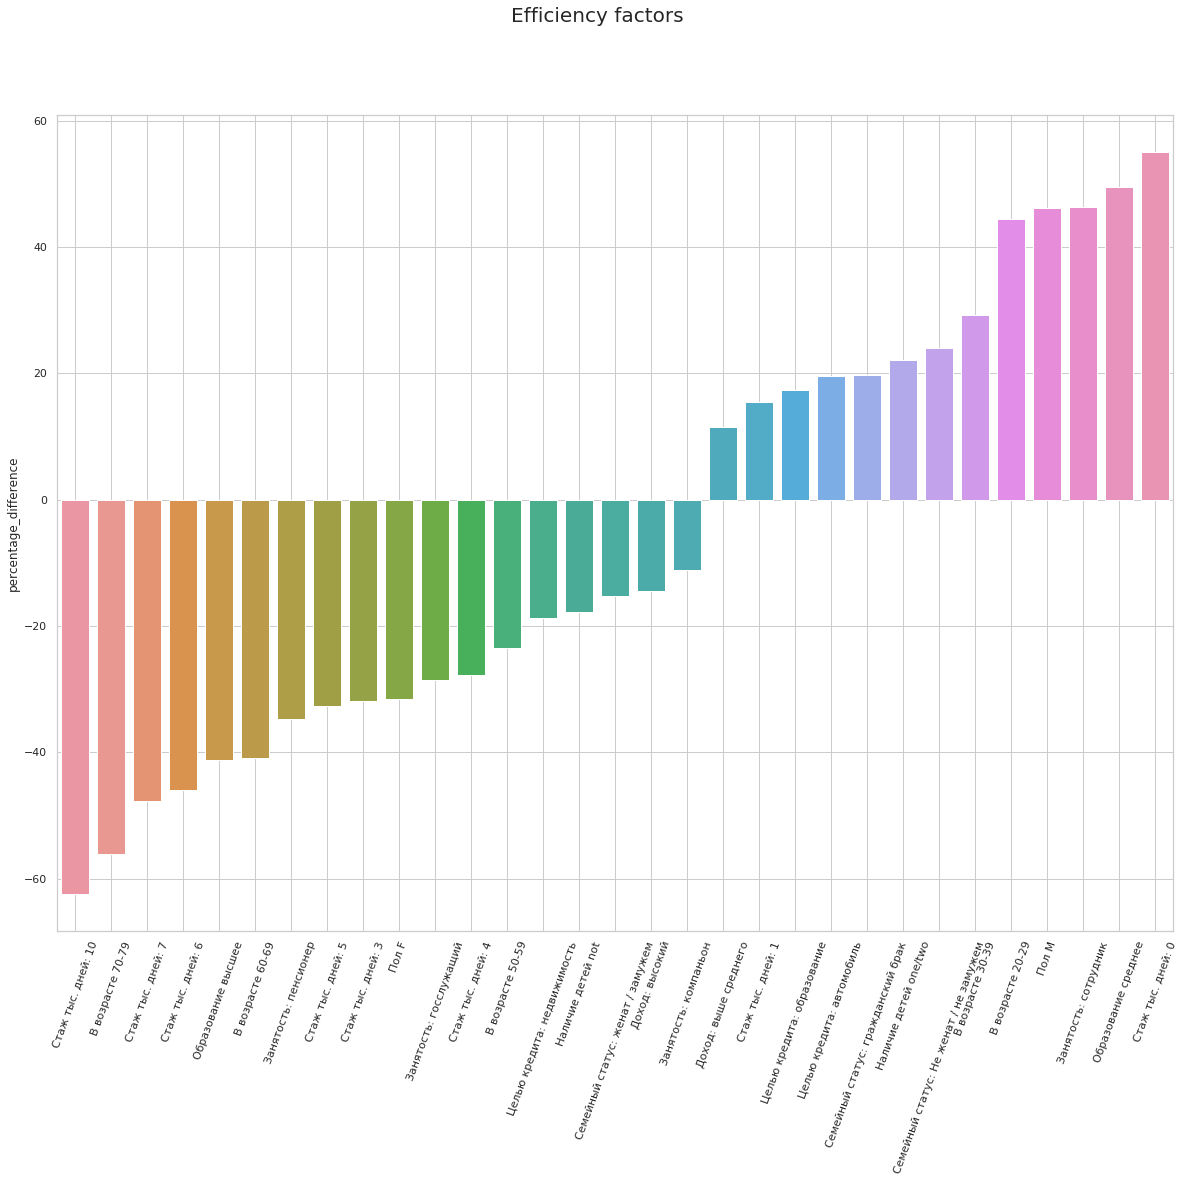

In [74]:
plt.figure(figsize=(20, 15))
plt.suptitle('Efficiency factors',  fontsize = 20)
plt.xticks(rotation=70)
ax = sns.barplot(data=result,
                 x=result.apply(lambda x: f'{x.column_name} {x.column_value}', axis=1),
                 y=result['percentage_difference'])
ax.xaxis.grid(True)

## Выводы

1. Есть ли зависимость между наличием детей и возвратом кредита в срок?  
В среднем заемщики без детей имеют задолжности на 17% реже, а заемщики с 1-2 детьми на 22% чаще.  

2. Есть ли зависимость между семейным положением и возвратом кредита в срок?    
В среднем женатые/замужние заемщики имеют задолжности на 15% реже, а заемщики не женатые/не замужение на 24% чаще. Состоящие же в гражданском браже на 19% чаще.

3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?  
В среднем заемщики с высоким доходом имеют задолжности на 14% реже, а заемщики с доходом выше среднего на 11% чаще.

4. По совокупности факторов портрет наиболее добросовестного заемщика выглядит как женщина пристарелого возраста с большим скажем работы и высшим образованием.

5. Портрет заемщика с повышеными рисками это молодой мужчина с небольшим стажем работ и средним образованием

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Александр, мне понравилось то, как ты выполнил проект, у тебя очень интересные подходы, а также рассуждения, молодец!



</div>

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    

Мне все же кажется, что от дохода должна быть зависимость, это логично

Давай посмотрим на % невозвратов с учетом более равномерной категоризации, в таком случае попадет больше объектов в группу и наши суждения будут объективнее:
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
Спасибо за совет. Исправил данные по доходу и вывод
</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 
    
    
Не за что! Александр, у тебя получился очень даже интересный и хороший проект, я желаю тебе успехов в дальнейшем обучении!

</div>

In [75]:
# КОД РЕВЬЮВЕРА

df['total_income_category'] = pd.qcut(df['total_income'], 4, labels=["низкий", "средний", "выше среднего", "высокий"])
print(df['total_income_category'].value_counts())

низкий           5360
высокий          5359
выше среднего    5359
средний          5359
Name: total_income_category, dtype: int64


In [76]:
# КОД РЕВЬЮВЕРА

import plotly.express as px

def pivot(data, index):
    
    pivot = data.pivot_table(index = index, values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
    pivot.columns = [index, 'Кол-во клиентов', 'Кол-во должников', '% невозврата']
    display(pivot.sort_values('% невозврата', ascending = False))
    
    
    
    fig = px.bar(pivot, x = index, y = '% невозврата', color = '% невозврата', title = '% невозврата по ' + index)
    fig.show()
    

pivot(df, 'total_income_category')

total_income_category  Кол-во клиентов  Кол-во должников  % невозврата
2         выше среднего             5359               471      0.087890
1               средний             5359               457      0.085277
0                низкий             5360               425      0.079291
3               высокий             5359               386      0.072028

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Обрати внимание, что % невозвратов для среднего класса выше, нежели для низкого и высокого. Я могу это объяснить так: люди с низким доходом вероятнее всего просто не берут кредит на то, чего не смогут вернуть, проходят куда более строгий контроль; люди с высоким достатком просто обладают достаточными средствами на погашение; люди со средними доходами вероятно слишком оптимистично подходят к своим финансовыми возможностям

</div>

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21437 entries, 0 to 21453
Data columns (total 13 columns):
children                 21437 non-null int64
days_employed            21437 non-null object
dob_years                21437 non-null int64
education                21437 non-null object
education_id             21437 non-null int64
family_status            21437 non-null object
family_status_id         21437 non-null int64
gender                   21437 non-null object
income_type              21437 non-null object
debt                     21437 non-null int64
total_income             21437 non-null int64
purpose                  21437 non-null object
total_income_category    21437 non-null category
dtypes: category(1), int64(6), object(6)
memory usage: 2.1+ MB


In [80]:
df['days_employed'] = df['days_employed'].astype(str)

In [81]:
df

children days_employed  dob_years education  education_id  \
0             1          8437         42    высшее             0   
1             1          4024         36   среднее             1   
2             0          5623         33   среднее             1   
3             3          4124         32   среднее             1   
4             0          3402         53   среднее             1   
...         ...           ...        ...       ...           ...   
21449         1          4529         43   среднее             1   
21450         0          3439         67   среднее             1   
21451         1          2113         38   среднее             1   
21452         3          3112         38   среднее             1   
21453         2          1984         40   среднее             1   

          family_status  family_status_id gender income_type  debt  \
0       женат / замужем                 0      F   сотрудник     0   
1       женат / замужем                 0      F   сотрудник     0   
2       женат / замужем                 0      M   сотрудник     0   
3       женат / замужем                 0      M   сотрудник     0   
4      гражданский брак                 1      F   пенсионер     0   
...                 ...               ...    ...         ...   ...   
21449  гражданский брак                 1      F   компаньон     0   
21450   женат / замужем                 0      F   пенсионер     0   
21451  гражданский брак                 1      M   сотрудник     1   
21452   женат / замужем                 0      M   сотрудник     1   
21453   женат / замужем                 0      F   сотрудник     0   

       total_income       purpose total_income_category  
0            253875  недвижимость               высокий  
1            112080    автомобиль               средний  
2            145885  недвижимость               средний  
3            267628   образование               высокий  
4            158616       свадьба         выше среднего  
...             ...           ...                   ...  
21449        224791  недвижимость               высокий  
21450        155999    автомобиль         выше среднего  
21451         89672  недвижимость                низкий  
21452        244093    автомобиль               высокий  
21453         82047    автомобиль                низкий  

[21437 rows x 13 columns]